In [18]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

raw = pd.read_csv('./data/assignment2data.csv')
#raw

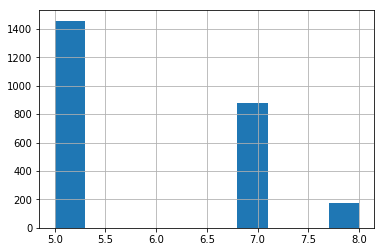

In [19]:
# Plot output values. Since the output qualities
# are either 5, 7 or 8, consider this a three class binary classification problem
raw['quality'].hist(bins=10)

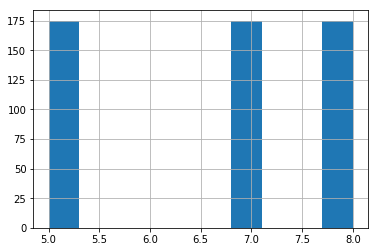

In [20]:
high = raw[raw.quality == 8]
med = raw[raw.quality == 7]
low = raw[raw.quality == 5]

# Get the lowest n per category
nPerCategory = min(len(high), len(med), len(low))

df = pd.concat([
    high.sample(n=nPerCategory),
    med.sample(n=nPerCategory),
    low.sample(n=nPerCategory)
])

df.quality.hist(bins=10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.120006,0.282304,0.181695,0.148078,0.020533,0.168581,0.385227,-0.500026,-0.043883,-0.281139,-0.150060
volatile acidity,-0.120006,1.000000,-0.179333,-0.046530,0.039222,-0.161901,-0.009933,-0.143361,0.027505,-0.104340,0.213587,-0.102547
citric acid,0.282304,-0.179333,1.000000,0.094762,0.035489,0.149910,0.155102,0.154327,-0.153879,0.050639,-0.092456,-0.063696
residual sugar,0.181695,-0.046530,0.094762,1.000000,0.212130,0.209855,0.418468,0.819960,-0.284791,-0.095215,-0.491573,-0.221565
chlorides,0.148078,0.039222,0.035489,0.212130,1.000000,0.102390,0.334538,0.407598,-0.146183,-0.005218,-0.449236,-0.297936
free sulfur dioxide,0.020533,-0.161901,0.149910,0.209855,0.102390,1.000000,0.627552,0.241325,-0.020698,0.150939,-0.212264,-0.048276
total sulfur dioxide,0.168581,-0.009933,0.155102,0.418468,0.334538,0.627552,1.000000,0.579484,-0.053988,0.084233,-0.506167,-0.271048
density,0.385227,-0.143361,0.154327,0.819960,0.407598,0.241325,0.579484,1.000000,-0.211097,0.026395,-0.857007,-0.459131
pH,-0.500026,0.027505,-0.153879,-0.284791,-0.146183,-0.020698,-0.053988,-0.211097,1.000000,0.181210,0.199001,0.164091
sulphates,-0.043883,-0.104340,0.050639,-0.095215,-0.005218,0.150939,0.084233,0.026395,0.181210,1.000000,-0.030639,-0.003531


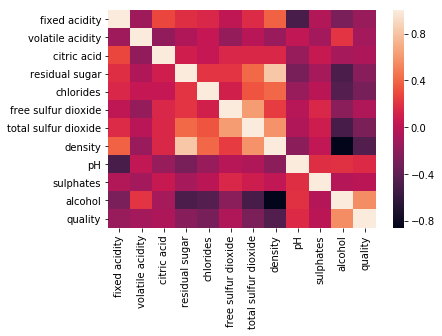

In [21]:
import seaborn as sns

sns.heatmap(df.corr())
df.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,pH,sulphates,quality
fixed acidity,1.000000,-0.120006,0.282304,0.181695,0.148078,0.020533,0.168581,-0.500026,-0.043883,-0.150060
volatile acidity,-0.120006,1.000000,-0.179333,-0.046530,0.039222,-0.161901,-0.009933,0.027505,-0.104340,-0.102547
citric acid,0.282304,-0.179333,1.000000,0.094762,0.035489,0.149910,0.155102,-0.153879,0.050639,-0.063696
residual sugar,0.181695,-0.046530,0.094762,1.000000,0.212130,0.209855,0.418468,-0.284791,-0.095215,-0.221565
chlorides,0.148078,0.039222,0.035489,0.212130,1.000000,0.102390,0.334538,-0.146183,-0.005218,-0.297936
free sulfur dioxide,0.020533,-0.161901,0.149910,0.209855,0.102390,1.000000,0.627552,-0.020698,0.150939,-0.048276
total sulfur dioxide,0.168581,-0.009933,0.155102,0.418468,0.334538,0.627552,1.000000,-0.053988,0.084233,-0.271048
pH,-0.500026,0.027505,-0.153879,-0.284791,-0.146183,-0.020698,-0.053988,1.000000,0.181210,0.164091
sulphates,-0.043883,-0.104340,0.050639,-0.095215,-0.005218,0.150939,0.084233,0.181210,1.000000,-0.003531
quality,-0.150060,-0.102547,-0.063696,-0.221565,-0.297936,-0.048276,-0.271048,0.164091,-0.003531,1.000000


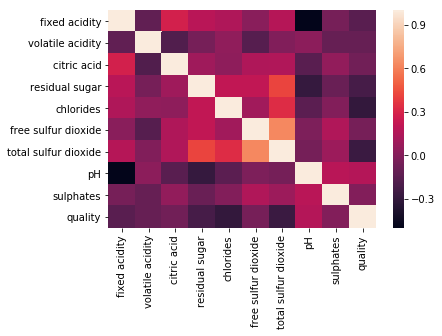

In [33]:
processed = df.drop(
    [
        'density',
        'alcohol'
#         'citric acid',
#         'fixed acidity',
#         'volatile acidity',
#         'sulphates',
#         'residual sugar',
#         'free sulfur dioxide',
#         'density',
#         'chlorides',
#         'total sulfur dioxide'
    ], 1)

processed = processed.sample(frac=1)

sns.heatmap(processed.corr())
processed.corr()

In [23]:
normed = (processed - processed.min())/(processed.max() - processed.min())
normed.quality = normed.quality * 3 + 5
training = normed[:420]
testing = normed[420:]

normed

,pH,alcohol,quality
2274,0.15,0.054545,8.0
2147,0.40,0.272727,5.0
1084,0.81,0.327273,5.0
10,0.68,0.363636,8.0
794,0.27,0.472727,5.0
283,0.46,0.181818,5.0
439,0.46,0.618182,8.0
1342,0.42,0.163636,5.0
801,0.20,0.454545,7.0
1436,0.42,0.127273,5.0


In [24]:
normed.to_csv("./data/training.csv", index=False)
normed.to_csv("./data/testing.csv", index=False)

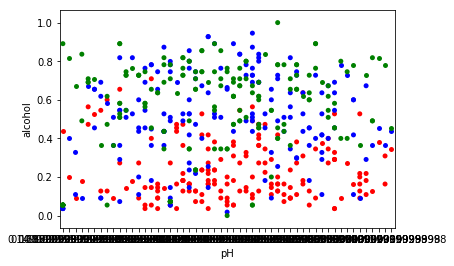

In [31]:
sns.stripplot(x='pH', y='alcohol', data=normed[normed.quality == 5], color='red')
sns.stripplot(x='pH', y='alcohol', data=normed[normed.quality == 7], color='blue')
sns.stripplot(x='pH', y='alcohol', data=normed[normed.quality == 8], color='green')